#Installs of Necessary Packages



In [0]:
pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [0]:
pip install pandas-profiling==2.6.0

     |████████████████████████████████| 245kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 1.5MB 9.1MB/s 
     |████████████████████████████████| 8.7MB 20.5MB/s 
     |████████████████████████████████| 614kB 48.2MB/s 
     |████████████████████████████████| 296kB 48.8MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=00806e86dc0a22454dcdc5c91fc1d3a4fa8255168f9659f137d59a9efe1c0e80
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=5d818a359e62159f62c6f05e704187ea844fae3a26a7c032dce5aeed0db1ef9e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for tangled-up-in-unicode: filename=tangled_up_in_unicode-0.0.4-cp36-none-any

In [0]:
pip install pdpbox

     |████████████████████████████████| 57.7MB 1.2MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=0ae22c70c4054062fc7b9c1d9da6c4c28b3631393fea2090a022857ed55320f4
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394130 sha256=514f45965d4592c20a4bf86a605b3fe6a080cb8bf7d30b9b094456440e7cccbf
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


#Package Imports


In [1]:
import pandas as pd 
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression 
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pdpbox.pdp import pdp_isolate, pdp_plot
import plotly.graph_objs as go
from pdpbox import pdp
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns
import shap
from sklearn.linear_model import LinearRegression 
from pandas_profiling import ProfileReport
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

Using TensorFlow backend.


#Importing Data(Locally)


In [0]:
youtube = pd.read_csv('Youtube.csv')

In [0]:
pd.set_option('display.max_rows', None)

In [0]:
youtube.country.value_counts(ascending=True)

IL       1
EC       1
LB       1
BB       1
KH       1
NG       1
ZA       1
MT       1
AL       1
BH       1
NP       1
EE       1
BO       1
HK       1
HU       1
BG       1
SY       1
QA       1
UY       1
BY       2
MK       2
AQ       2
KW       2
CZ       2
CN       2
TW       2
TN       2
RS       2
JM       2
DK       3
SV       3
SG       3
SI       3
FI       3
JO       3
PT       3
BE       3
PA       3
DO       3
CH       4
AT       4
VE       5
PE       5
IE       5
MY       5
DZ       5
NZ       7
PR       8
BD       8
CL       8
NO       8
RO       9
NL      10
IQ      11
MA      11
SE      12
PK      12
PL      13
AE      16
IT      16
PH      17
EG      18
UA      19
JP      30
AR      35
TR      36
AU      38
CO      39
SA      44
DE      45
KR      46
ID      49
VN      49
TH      70
CA      74
FR      75
RU      81
ES     127
MX     128
GB     179
IN     355
BR     396
US    1253
Name: country, dtype: int64

In [0]:
youtube.head()

,web-scraper-order,web-scraper-start-url,userID,userID-href,name,uploads,subscribers,videoviews,country,channeltype,usercreated,grade,YouTube_Link,YouTube_Link-href,TwitterHandle,TwitterHandle-href,InstagramHandle,InstagramHandle-href,MonthlyEarnings,YearlyEarnings
0,1553043067-5148,https://socialblade.com/youtube/top/5000/mosts...,PewDiePie,https://socialblade.com/youtube/c/pewdiepie,PewDiePie,3779,90210848,20772365682,US,Entertainment,"Apr 29th, 2010",A,NaN,https://youtube.com/channel/UC-lHJZR3Gqxm24_Vd...,NaN,https://twitter.com/pewdiepie,NaN,https://instagram.com/pewdiepie,$66.9K - $1.1M,$802.3K - $12.8M
1,1553043023-5137,https://socialblade.com/youtube/top/5000/mosts...,Dude Perfect,https://socialblade.com/youtube/c/dudeperfect,Dude Perfect,201,40202277,7453264532,US,Sports,"Mar 17th, 2009",A,NaN,https://youtube.com/channel/UCRijo3ddMTht_IHyN...,NaN,https://instagram.com/dudeperfect,NaN,https://plus.google.com/112148941071912883669,$46.5K - $743.3K,$557.5K - $8.9M
2,1553043019-5136,https://socialblade.com/youtube/top/5000/mosts...,HolaSoyGerman.,https://socialblade.com/youtube/c/holasoygermna,HolaSoyGerman.,137,38503519,3842065134,CL,Entertainment,"Sep 8th, 2011",B+,NaN,https://youtube.com/channel/UCZJ7m7EnCNodqnu5S...,NaN,https://www.twitter.com/germangarmendia,NaN,https://instagram.com/germanchelo,$7.2K - $114.6K,$85.9K - $1.4M
3,1553043015-5135,https://socialblade.com/youtube/top/5000/mosts...,Ed Sheeran,https://socialblade.com/youtube/c/ed-sheeran,Ed Sheeran,123,37683352,16255758481,GB,Music,"Aug 8th, 2006",A,NaN,https://youtube.com/channel/UC0C-w0YjGpqDXGB8I...,NaN,https://instagram.com/teddysphotos/,NaN,https://plus.google.com/111802951085850161475,$50.4K - $807.2K,$605.4K - $9.7M
4,1553043011-5134,https://socialblade.com/youtube/top/5000/mosts...,Badabun,https://socialblade.com/youtube/c/badabunoficial,Badabun,3866,37292948,10836102246,MX,Entertainment,"Oct 14th, 2014",A+,NaN,https://youtube.com/channel/UCYWOjHweP2V-8kGKm...,NaN,https://instagram.com/badabunoficial,NaN,https://plus.google.com/117613648034542920927,$164.9K - $2.6M,$2M - $31.7M


In [0]:
youtube.tail()


,web-scraper-order,web-scraper-start-url,userID,userID-href,name,uploads,subscribers,videoviews,country,channeltype,usercreated,grade,YouTube_Link,YouTube_Link-href,TwitterHandle,TwitterHandle-href,InstagramHandle,InstagramHandle-href,MonthlyEarnings,YearlyEarnings
3939,1553037913-3921,https://socialblade.com/youtube/top/5000/mosts...,Genius,https://socialblade.com/youtube/c/genius?,genius,0,20,0,NaN,Games,"Aug 28th, 2005",D-,NaN,https://youtube.com/channel/UCdNvF54AYp2qRt8Dk...,NaN,NaN,NaN,https://youtube.com/channel/UCdNvF54AYp2qRt8Dk...,$0 - $0,$0 - $0
3940,1553024302-913,https://socialblade.com/youtube/top/5000/mosts...,Wolfychu,https://socialblade.com/youtube/c/wolfychu,WolfyChu,16,18,757,NaN,NaN,"Feb 10th, 2008",TBD,NaN,https://youtube.com/channel/UCylrI37DWJfPPo8W2...,NaN,NaN,NaN,https://youtube.com/channel/UCylrI37DWJfPPo8W2...,$0.65 - $10,$8 - $124
3941,1553034470-3276,https://socialblade.com/youtube/top/5000/mosts...,FRANKIEonPC,https://socialblade.com/youtube/c/frankieonpc,frankieonpc,0,16,0,GB,Games,--,B-,NaN,https://youtube.com/channel/UCHF3A1sMkv7Q0ywaz...,NaN,NaN,NaN,https://youtube.com/channel/UCHF3A1sMkv7Q0ywaz...,$195 - $3.1K,$2.3K - $37.5K
3942,1553040011-4402,https://socialblade.com/youtube/top/5000/mosts...,Hi Gorgeous Anna Layza,https://socialblade.com/youtube/c/higorgeous,higorgeous,1,16,918,NaN,Comedy,"Jan 2nd, 2007",B+,NaN,https://youtube.com/channel/UClrGcMQweED1oqTES...,NaN,NaN,NaN,https://youtube.com/channel/UClrGcMQweED1oqTES...,$19.9K - $318.2K,$238.7K - $3.8M
3943,1553027486-1650,https://socialblade.com/youtube/top/5000/mosts...,Druzhko Show,https://socialblade.com/youtube/c/druzhkoshow,druzhko show,0,12,0,NaN,NaN,"Jan 30th, 2017",D-,NaN,https://youtube.com/channel/UCFYVnwfusuBfdNlKQ...,NaN,NaN,NaN,https://youtube.com/channel/UCFYVnwfusuBfdNlKQ...,$0 - $0,$0 - $0


In [0]:
youtube.isnull().sum()

web-scraper-order           0
web-scraper-start-url       0
userID                      0
userID-href                 0
name                        0
uploads                     0
subscribers                 0
videoviews                  0
country                   294
channeltype               263
usercreated                 0
grade                       0
YouTube_Link             3885
YouTube_Link-href          59
TwitterHandle            3892
TwitterHandle-href        610
InstagramHandle          3902
InstagramHandle-href       59
MonthlyEarnings             0
YearlyEarnings              0
dtype: int64

In [0]:
youtube.describe()

,uploads,subscribers,videoviews
count,3859.000000,3.859000e+03,3.859000e+03
mean,2083.466183,4.517487e+06,1.238520e+09
std,9353.458073,4.982385e+06,2.250483e+09
min,0.000000,1.200000e+01,0.000000e+00
25%,124.500000,2.361056e+06,2.797434e+08
50%,335.000000,3.058184e+06,6.109912e+08
75%,1039.500000,4.700786e+06,1.359939e+09
max,203628.000000,9.021085e+07,6.509206e+10


#Pandas Profile for Data

In [0]:
profile = ProfileReport(youtube, minimal=True).to_notebook_iframe()

profile

#Function for Data Wrangle

In [0]:
def data_wrangle(X):
  X=X.copy()
  #columns to be deleted(high cardinality)
  deleted=['web-scraper-order','web-scraper-start-url','userID',
           'userID-href','YouTube_Link','YouTube_Link-href',
           'TwitterHandle','TwitterHandle-href','InstagramHandle',
           'InstagramHandle-href']

  X=X.drop(columns=deleted)

  #split columns from ranges into seperate columns
  X[['monthly_lower_range','monthly_higher_range']]=X.MonthlyEarnings.str.split("-",expand=True)
  X[['yearly_lower_range','yearly_higher_range']]=X.YearlyEarnings.str.split("-", expand=True)

  #delete original columns
  wages=['MonthlyEarnings','YearlyEarnings']
  X=X.drop(columns=wages)

  #Delete Dollar Sign
  col_with_dollar=['monthly_lower_range','monthly_higher_range',
                   'yearly_lower_range','yearly_higher_range']
  for col in col_with_dollar:
      X[col] = X[col].str.replace('$', '')

  #Replace K with two zeros (all values are in decimals form)
  #Example 1.1k
  col_with_k=['monthly_lower_range','monthly_higher_range',
              'yearly_lower_range','yearly_higher_range']
  for col in col_with_k:
    X[col]=X[col].str.replace('K','00')

  #Replace all M with 5 zeros (all values are in decimal form)
  #Example 1.3M
  col_with_m=['monthly_lower_range','monthly_higher_range',
              'yearly_lower_range','yearly_higher_range']
  for col in col_with_m:
    X[col]=X[col].str.replace('M','00000')

  #Remove Decimals
  col_with_decimal=['monthly_lower_range','monthly_higher_range',
                    'yearly_lower_range','yearly_higher_range']
  for col in col_with_decimal:
    X[col]=X[col].str.replace('.','')  

  #Covert from Euro to Dollar (database was in Euros)
  col_convert=['monthly_lower_range','monthly_higher_range',
               'yearly_lower_range','yearly_higher_range']
  for col in col_convert:
    X[col]=X[col].astype(float)*1.08

  #Add two new columns (averages for year and month)
  X['yearly_average']=X.yearly_lower_range + X.yearly_higher_range/ 2
  X['monthly_average']=X.yearly_average/12

  #Take out low outliers 
  X=X[X['monthly_lower_range']>1000]
  X=X[X['yearly_lower_range']>0]

  #use top ten of the channel types to reduce cardinality
  top10=X['channeltype'].value_counts()[:10].index
  X.loc[~X['channeltype'].isin(top10),'channeltype']=='Other'

  #Covert user created to datetime, to retrieve year
  #then delete date column
  X['usercreated']=pd.to_datetime(X['usercreated'])
  X['yearcreated']=X['usercreated'].dt.year
  X=X.drop(columns='usercreated')
  
  #set index to the name 
  #for future predictions
  X=X.set_index(keys='name')

  return X

#Testing Data Wrangle

In [0]:
#make a copy of data to test wrangle on
sampledata=youtube.copy()

In [0]:
sampledata=data_wrangle(sampledata)

In [0]:
#look at shape of data
sampledata.shape

(2885, 13)

In [0]:
#check null values
sampledata.isnull().sum()

uploads                 0
subscribers             0
videoviews              0
channeltype             0
grade                   0
monthly_lower_range     0
monthly_higher_range    0
yearly_lower_range      0
yearly_higher_range     0
yearly_average          0
monthly_average         0
dtype: int64

In [0]:
#check head to make sure wrangle took
#look for new features
#check math on euro conversion
sampledata.head()

,uploads,subscribers,videoviews,channeltype,grade,monthly_lower_range,monthly_higher_range,yearly_lower_range,yearly_higher_range,yearly_average,monthly_average
name,,,,,,,,,,,
PewDiePie,3779,90210848,20772365682,Entertainment,A,72252.0,1188000.0,866484.0,13824000.0,7778484.0,666252.0
Dude Perfect,201,40202277,7453264532,Sports,A,50220.0,802764.0,602100.0,9612000.0,5408100.0,451602.0
HolaSoyGerman.,137,38503519,3842065134,Entertainment,B+,7776.0,123768.0,92772.0,1512000.0,848772.0,69660.0
Ed Sheeran,123,37683352,16255758481,Music,A,54432.0,871776.0,653832.0,10476000.0,5891832.0,490320.0
whinderssonnunes,362,35123697,2858803818,Comedy,B+,10260.0,164592.0,123444.0,1944000.0,1095444.0,92556.0


In [0]:
#check for extreme outliers left over after wrangle
sampledata.describe(include='all')

,uploads,subscribers,videoviews,channeltype,grade,monthly_lower_range,monthly_higher_range,yearly_lower_range,yearly_higher_range,yearly_average,monthly_average
count,3443.000000,3.443000e+03,3.443000e+03,3443,3443,3443.000000,3.443000e+03,3.443000e+03,3.443000e+03,3.443000e+03,3443.000000
unique,NaN,NaN,NaN,16,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Entertainment,B+,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,923,1276,NaN,NaN,NaN,NaN,NaN,NaN
mean,2163.383967,4.393324e+06,1.251152e+09,NaN,NaN,8430.013872,1.341549e+05,9.998347e+04,1.625792e+06,9.128796e+05,75507.455638
std,9544.730736,4.011065e+06,1.760027e+09,NaN,NaN,11842.580979,1.904220e+05,1.405790e+05,2.272338e+06,1.260885e+06,105939.024259
min,0.000000,1.600000e+01,0.000000e+00,NaN,NaN,11.880000,9.720000e+02,2.160000e+02,2.376000e+03,2.700000e+03,1031.400000
25%,152.000000,2.377432e+06,3.348161e+08,NaN,NaN,1404.000000,2.089800e+04,1.630800e+04,2.642220e+05,1.545750e+05,13014.000000
50%,384.000000,3.083187e+06,6.864635e+08,NaN,NaN,3996.000000,6.436800e+04,4.827600e+04,7.867800e+05,4.480920e+05,36342.000000
75%,1145.500000,4.708366e+06,1.453881e+09,NaN,NaN,10368.000000,1.657260e+05,1.240380e+05,1.944000e+06,1.096038e+06,93069.000000


In [0]:
#check d types
sampledata.dtypes

uploads                   int64
subscribers               int64
videoviews                int64
channeltype              object
grade                    object
monthly_lower_range     float64
monthly_higher_range    float64
yearly_lower_range      float64
yearly_higher_range     float64
yearly_average          float64
monthly_average         float64
dtype: object

#Applying Data Wrangle

In [0]:
youtube=data_wrangle(youtube)

In [0]:
#check shape
youtube.shape

(2885, 13)

In [0]:
#check head
youtube.head()

,uploads,subscribers,videoviews,channeltype,grade,monthly_lower_range,monthly_higher_range,yearly_lower_range,yearly_higher_range,yearly_average,monthly_average
name,,,,,,,,,,,
PewDiePie,3779,90210848,20772365682,Entertainment,A,72252.0,1188000.0,866484.0,13824000.0,7778484.0,666252.0
T-Series,13218,90194329,65092058996,Music,A++,686448.0,11016000.0,8208000.0,13176000.0,14796000.0,6194448.0
5-Minute Crafts,2850,52039165,12853732711,Howto,A+,134460.0,216000.0,1620000.0,25812000.0,14526000.0,242460.0
Canal KondZilla,995,47785398,23658901687,Music,A+,130032.0,2052000.0,1512000.0,24948000.0,13986000.0,1156032.0
SET India,29688,43974122,30601562478,Entertainment,A++,343764.0,5508000.0,4104000.0,65988000.0,37098000.0,3097764.0


In [0]:
#check lower (make sure outliers were dropped)
youtube.monthly_lower_range.min()

111888.00000000001

#Data Visualizations


In [0]:
sorted_youtube=youtube.sort_values(by=['subscribers'],ascending=False)
top_ten=sorted_youtube.head(10)

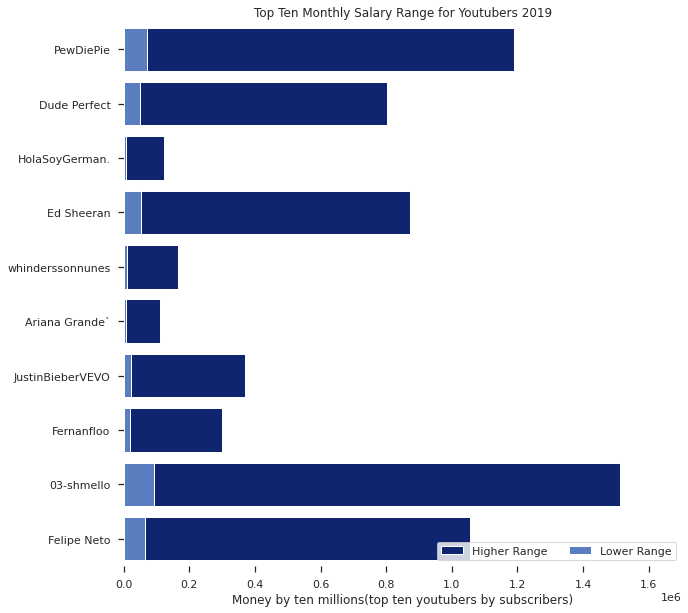

In [0]:
f, ax = plt.subplots(figsize=[10,10])

sns.set_color_codes("dark")
sns.barplot(x="monthly_higher_range", y=top_ten.index, data=top_ten,
            label="Higher Range", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="monthly_lower_range", y=top_ten.index, data=top_ten,
            label="Lower Range", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,1700000), ylabel="",
       xlabel="Money by ten millions(top ten youtubers by subscribers)",
       title='Top Ten Monthly Salary Range for Youtubers 2019')
sns.despine(left=True, bottom=True)
f.savefig("monthly.png")

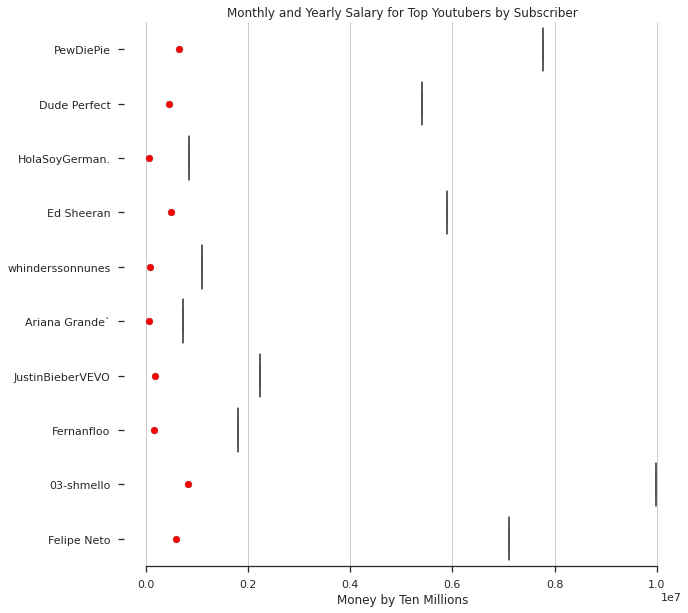

In [0]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=[10,10])


# Plot the orbital period with horizontal boxes
sns.boxplot(x='yearly_average', y=top_ten.index, data=top_ten,
            whis="range", palette="vlag")

# Add in points to show each observation

sns.swarmplot(x='monthly_average', y=top_ten.index, data=top_ten,
              size=7, color="red", linewidth=.3)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Money by Ten Millions',
       title='Monthly and Yearly Salary for Top Youtubers by Subscriber')
sns.despine(trim=True, left=True)
f.savefig("monthlyandyearly.png")

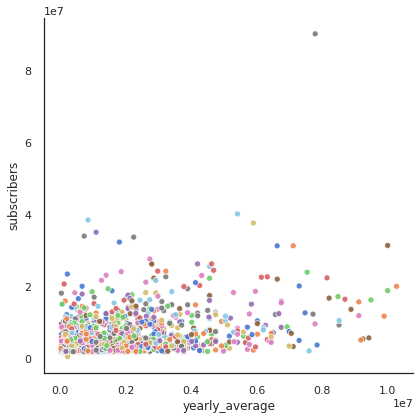

In [0]:
sns.set(style="white")
sns.relplot(x="yearly_average", y="subscribers", hue=youtube.index,
            alpha=.9, palette="muted",
            height=6, data=youtube, legend=None)
f.savefig("subscribersandyearly.png")
plt.show()

#3 Way Split for Validation

In [0]:
train=youtube.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                               random_state=42)

In [0]:
train, val = train_test_split(train, test_size=.20, 
                              random_state=42)

In [0]:
train.shape, val.shape, test.shape

((1846, 13), (462, 13), (577, 13))

#Leakage,Target, Features

In [0]:
leakage=['monthly_lower_range','monthly_higher_range',
         'yearly_lower_range','yearly_average',
         'yearly_higher_range']
train=train.drop(columns=leakage)
val=val.drop(columns=leakage)
test=test.drop(columns=leakage)

In [0]:
target='monthly_average'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]


In [0]:
youtube.monthly_average.mean()

72608.36668329171

#Accuracy Function for Testing My Models

In [0]:
#test needs to always be first
def accuracy_test(x,y):
  errors = abs(y - x)
  accuracy=errors/x
  accuracy_mean=np.mean(100 * (errors / x))

  return(accuracy_mean)


In [0]:
a_list=pd.Series([2039, 4992, 8906, 12094])
b_list=pd.Series([2039,4000,8000,12098])


In [0]:
c_list=a_list-b_list
print(c_list)

0      0
1    992
2    906
3     -4
dtype: int64


In [0]:
d_list=c_list**2
print(d_list)

0         0
1    984064
2    820836
3        16
dtype: int64


In [0]:
e_list=d_list**.5
print(e_list)

0      0.0
1    992.0
2    906.0
3      4.0
dtype: float64


In [0]:
f_list=e_list/a_list
print(f_list)

0    0.000000
1    0.198718
2    0.101729
3    0.000331
dtype: float64


In [0]:
g_list=f_list*100
print(g_list)

0     0.000000
1    19.871795
2    10.172917
3     0.033074
dtype: float64


In [0]:
h_list=g_list.mean()
print(h_list)

7.519446564501496


In [0]:
accuracy_test(a_list,b_list)

7.519446564501496

In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (e_list / a_list)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.48 %.


In [0]:
def accuracy_rate(x,y):
  difference=x-y
  pred_squared=difference**2
  pred_square_root=pred_squared**.5
  accuracy_columns=100 * pred_square_root/x
  accuracy_mean=100 - accuracy_columns.mean()
    
  return(accuracy_mean)


In [0]:
accuracy_rate(a_list,b_list)

92.4805534354985

#Baseline Model Random Forest



In [0]:
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100,n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
mae1 = mean_absolute_error(y_val, y_pred)
print(f'Test MAE: ${mae1:,.0f}')

Test MAE: $27,764


In [0]:
accuracy_test(y_val,y_pred)

84.66477687902504

In [0]:
accuracy_rate(y_val,y_pred)

15.335223120974959

Baseline Predictions have a 15% accuracy rate. Meaning, 15% of my predictions are accurate, with 84% in defficientcy

#Baseline Model Ridge Regression

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    SelectKBest(f_regression, k=20), 
    Ridge(alpha=1.0)
)

k = 3
scores = cross_val_score(pipeline, x_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [29424.44626591 27160.96977522 25396.41022776]


In [0]:
-scores.mean()

27327.275422961608

In [0]:
accuracy_test(y_test,y_pred)

474.98388791729525

Ridge Regression Model is wildly off, so this type of model would be a no go

#2nd Model Ridge Regression


In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SelectKBest(f_regression, k=7), 
    Ridge(alpha=.1)
)

k = 3
scores = cross_val_score(pipeline, x_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

1450.62123784856

#Linear Regression Models

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'),  
    LinearRegression()
)
# Fit on train
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_val)
accuracy_test(y_val,y_pred)


157.0544291192103

In [0]:
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'),  
    LinearRegression()
)

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_val)
accuracy_test(y_val,y_pred)


203.1505511037576

Due to Linear Models being Wildly out of range, Linear Model is not the way to go

#Random Forest Models 

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100,n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

84.25844612458344

New Model to beat is 84.258 discrepency

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=709, max_depth=1163, criterion='mae' )
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

85.10782966982917

Simple Imputer Median does affect my model for the better

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100,n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

83.87710192180013

One Hot Encoder Makes for a better Model

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=200,n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

83.64821180156

In [0]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median') 
)

x_train_transformed = transformers.fit_transform(x_train)
x_val_transformed = transformers.transform(x_val)

model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(x_train_transformed, y_train)


permuter = PermutationImportance(
    model,
    n_iter=5,
    random_state=42
)

permuter.fit(x_val_transformed, y_val)

feature_names = x_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.8831 ± 0.1454,grade
0.1655 ± 0.0491,videoviews
0.0255 ± 0.0410,subscribers
0.0059 ± 0.0201,uploads
-0.0044 ± 0.0177,channeltype


In [0]:
x_train=x_train.drop(columns='channeltype')
x_val=x_val.drop(columns='channeltype')
x_test=x_test.drop(columns='channeltype')

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=200,n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

83.57964987538925

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(), 
    RandomForestRegressor(n_estimators=200,n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)
accuracy_test(y_val,y_pred)

83.59254915424792

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(with_std=False), 
    RandomForestRegressor(n_estimators=709, max_depth=1163, criterion='mae', min_samples_leaf=2)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)

accuracy_test(y_val,y_pred)

82.03690770751194

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    RandomForestRegressor(n_estimators=709, max_depth=1163, criterion='mae', min_samples_leaf=2)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)

accuracy_test(y_val,y_pred)

81.92282942627348

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    RandomForestRegressor(n_estimators=709, max_depth=1163, criterion='mae', min_samples_leaf=3)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)

accuracy_test(y_val,y_pred)

78.76125497434342

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    RandomForestRegressor(n_estimators=709, max_depth=1163, criterion='mae', min_samples_leaf=5)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)

accuracy_test(y_val,y_pred)

77.8936309949836

#Decision Tree Model

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(),  
    DecisionTreeRegressor(random_state=42, min_samples_leaf=5, min_samples_split=3)
)
# Fit on train
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_val)
accuracy_test(y_val,y_pred)


94.72811289998677

#Final Model (Monthly Average)

In [0]:
train=youtube.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                               random_state=42)
train, val = train_test_split(train, test_size=len(test), 
                              random_state=42)

leakage=['monthly_higher_range','yearly_lower_range','yearly_higher_range','monthly_lower_range','yearly_average']
train=train.drop(columns=leakage)
val=val.drop(columns=leakage)
test=test.drop(columns=leakage)

target='monthly_average'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    RandomForestRegressor(n_estimators=709, max_depth=1163, criterion='mae', min_samples_leaf=4)
)

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_val)

accuracy_test(y_val,y_pred)

78.26399693176518

#Final Model (Yearly Average)

In [0]:
train=youtube.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                               random_state=42)
train, val = train_test_split(train, test_size=len(test), 
                              random_state=42)

leakage=['monthly_higher_range','yearly_lower_range',
         'yearly_higher_range','monthly_lower_range',
         'monthly_average']
train=train.drop(columns=leakage)
val=val.drop(columns=leakage)
test=test.drop(columns=leakage)

target='yearly_average'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(n_estimators=700, max_depth=1163, criterion='mae', 
                          min_samples_leaf=4, n_jobs=-1, random_state=42)
)

pipeline.fit(x_train,y_train)
y_pred_test=pipeline.predict(x_test)

print(accuracy_test(y_test,y_pred_test))
print(accuracy_rate(y_test,y_pred_test))

51.854490514553774
48.145509485446226


In [0]:
y_pred_test=pipeline.predict(x_test)

print(f'Deficit--Test',accuracy_test(y_test,y_pred_test))
print(f'Accuracy--Test',accuracy_rate(y_test,y_pred_test))
y_pred=pipeline.predict(x_val)

print(f'Deficit--Val',accuracy_test(y_val,y_pred))
print(f'Accuracy--Val',accuracy_rate(y_val,y_pred))

y_pred_train=pipeline.predict(x_train)

print(f'Deficit--Train',accuracy_test(y_train,y_pred_train))
print(f'Accuracy--Train',accuracy_rate(y_train,y_pred_train))

Deficit--Test 51.69512620641655
Accuracy--Test 48.30487379358345
Deficit--Val 53.85894388173701
Accuracy--Val 46.14105611826299
Deficit--Train 36.500138219842036
Accuracy--Train 63.499861780157964


#Model Interpretations(Yearly Average)

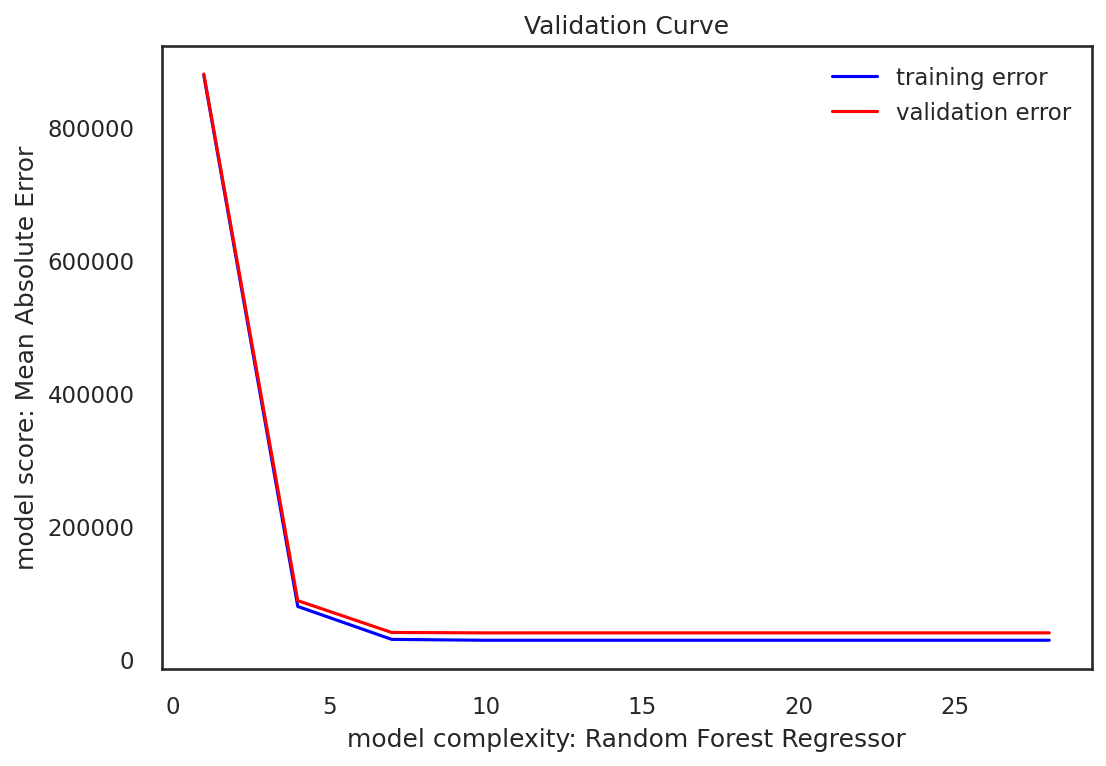

In [0]:
depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, x_train, y_train,
    param_name='randomforestregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: Random Forest Regressor')
plt.ylabel('model score: Mean Absolute Error')
plt.legend()
plt.savefig("ValidationCurve.png")
plt.show()

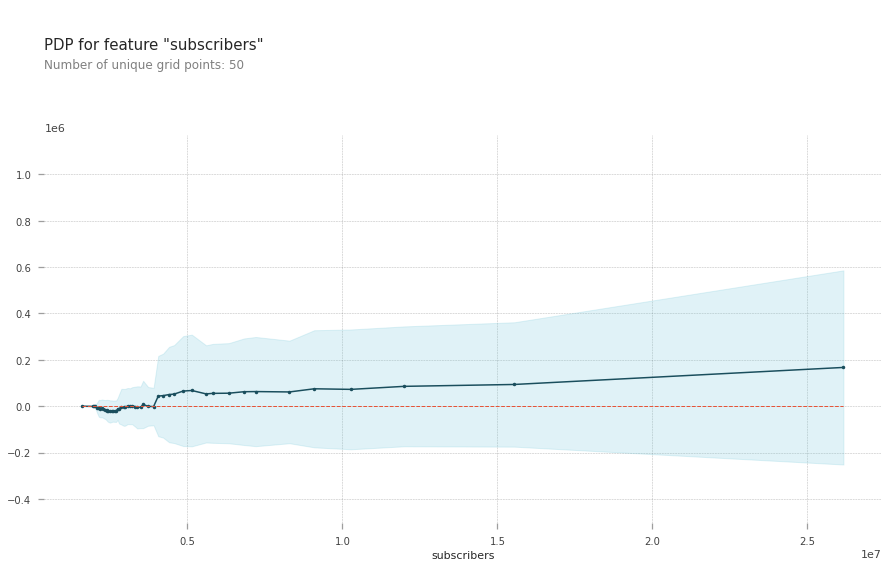

In [0]:
feature = 'subscribers'

isolated = pdp_isolate(
    model=pipeline,
    dataset=x_val,
    model_features=x_val.columns,
    num_grid_points=50,
    feature=feature
)

pdp_plot(isolated, feature_name=feature)
pdp.plt.savefig('subscribers.png', dpi=200)
plt.show()


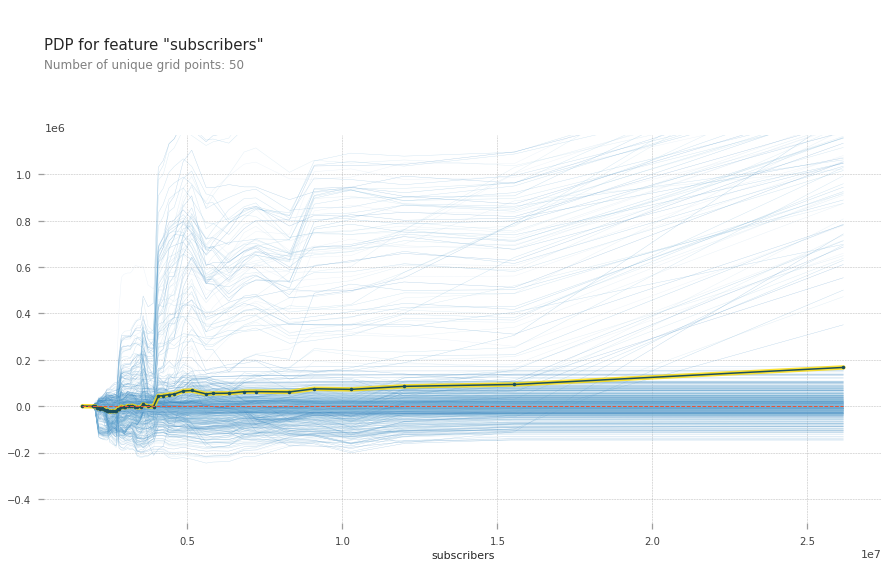

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True)
pdp.plt.savefig('subscriberswithlines.png', dpi=200)
plt.show()

TypeError: ignored

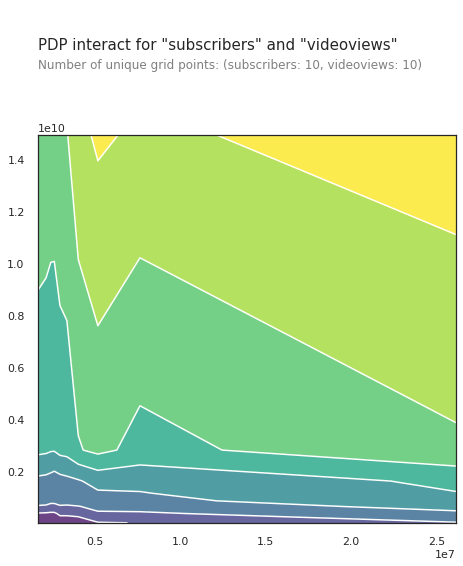

In [0]:
features = ['subscribers', 'videoviews']

interaction = pdp_interact(
    model=pipeline,
    dataset=x_val,
    model_features=x_val.columns,
    features=features
)

# pdp_interact_plot(interaction, plot_type='grid', feature_names=features);
pdp_interact_plot(interaction, plot_type='contour', feature_names=features)
pdp.plt.savefig('subscribersandvideoviews.png', dpi=200)
plt.show()

In [0]:
# First, make the 2D plot above. Then ...

pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show() 

#Feature Dependant Graphs (Categrorical Features)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


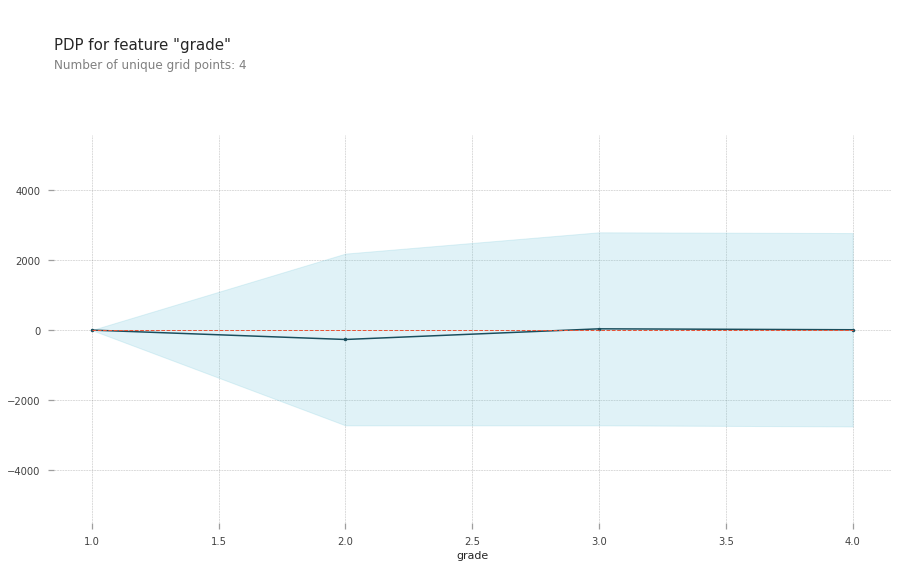

In [0]:
#dropping the standard scaler and simple imputer 
 feature = 'grade'
train=youtube.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                               random_state=42)

train, val = train_test_split(train, test_size=len(test), 
                              random_state=42)

leakage=['monthly_lower_range','monthly_higher_range','yearly_lower_range']
train=train.drop(columns=leakage)
val=val.drop(columns=leakage)
test=test.drop(columns=leakage)

target='yearly_higher_range'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]
# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
x_encoded = encoder.fit_transform(x_test)

model = RandomForestRegressor(n_estimators=709, max_depth=1163, 
                              criterion='mae', min_samples_leaf=4,
                              n_jobs=-1, random_state=42)
model.fit(x_encoded, y_test)

pdp_dist = pdp.pdp_isolate(model=model, dataset=x_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);


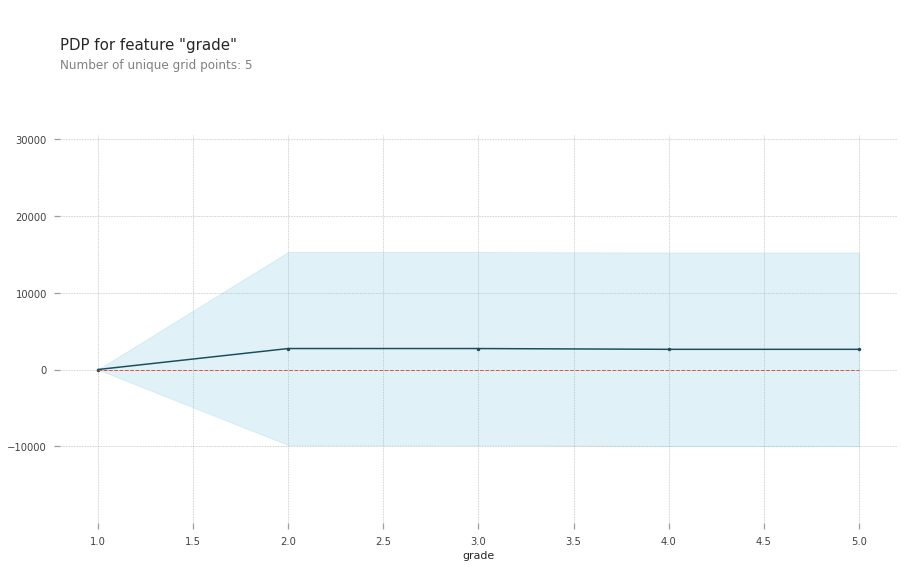

In [0]:
#using my actual model 
feature = 'grade'
train=youtube.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                               random_state=42)

train, val = train_test_split(train, test_size=len(test), 
                              random_state=42)

leakage=['monthly_lower_range','monthly_higher_range','yearly_lower_range']
train=train.drop(columns=leakage)
val=val.drop(columns=leakage)
test=test.drop(columns=leakage)

target='yearly_higher_range'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]

encoder = ce.OrdinalEncoder()
x_encoder = encoder.fit_transform(x_train)

imputer = SimpleImputer()
x_impute=imputer.fit_transform(x_encoder)



model =RandomForestRegressor(n_estimators=709, max_depth=1163,
                             criterion='mae', min_samples_leaf=4, 
                             n_jobs=-1, random_state=42) 

model.fit(x_impute, y_train)



pdp_dist = pdp.pdp_isolate(model=model, dataset=x_encoder, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);



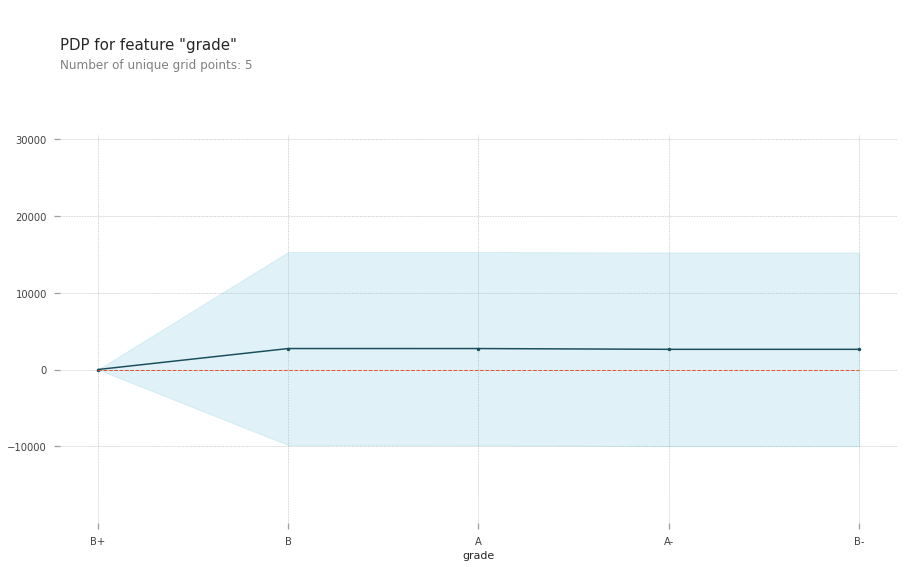

In [0]:
feature = 'grade'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()
pdp.pdp_plot(pdp_dist, feature)
plt.xticks(category_codes, category_names)
pdp.plt.savefig('image.png', dpi=200)
plt.show()

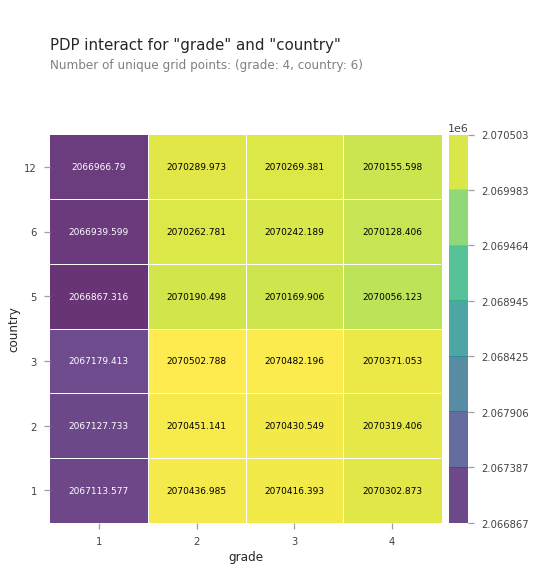

In [0]:
features = ['grade', 'country']

interaction = pdp_interact(
    model=model, 
    dataset=x_encoded, 
    model_features=x_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)
pdp.plt.savefig('gradeandcountry.png', dpi=200)
plt.show()

#Shaply Graph for app

In [16]:
train=youtube.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                               random_state=42)

train, val = train_test_split(train, test_size=.20, 
                              random_state=42)

leakage=['monthly_higher_range','yearly_lower_range',
         'yearly_higher_range','monthly_lower_range',
         'monthly_average']

train=train.drop(columns=leakage)
val=val.drop(columns=leakage)
test=test.drop(columns=leakage)

target='yearly_average'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer()
)

x_train_processed = processor.fit_transform(x_train)
x_val_processed = processor.transform(x_val)
x_test_processed = processor.transform(x_test)


model = RandomForestRegressor(n_estimators=700, max_depth=1163, criterion='mae', 
                          min_samples_leaf=4, n_jobs=-1, random_state=42)
model.fit(x_train_processed, y_train)
y_pred=model.predict(x_test_processed)

print(accuracy_test(y_test,y_pred))

51.7559350528081


In [17]:
model.predict(row_processed)

array([3992149.49142857])

In [9]:
row

,uploads,subscribers,videoviews,country,channeltype,grade,yearcreated
name,,,,,,,
Alan Walker,173,22328931,5981936573,Other,Music,A,2012


In [13]:

row = x_val.iloc[[1]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)

shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
)

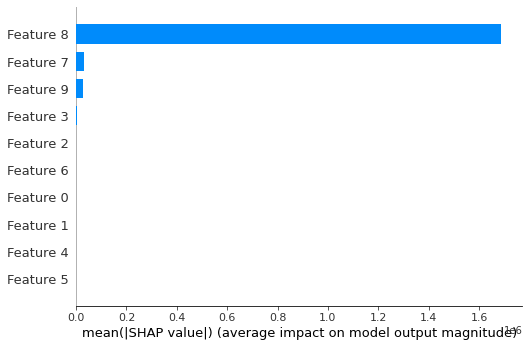

In [0]:
shap_values = shap.TreeExplainer(model).shap_values(x_test_scaled)
shap.summary_plot(shap_values, x_test_scaled, plot_type="bar")

IndexError: ignored

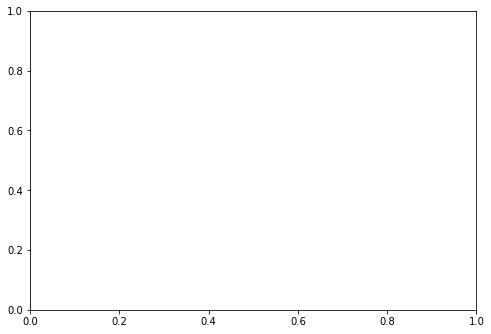

In [0]:
f = plt.figure()
shap.summary_plot(shap_values, x_test_scaled )

#Final Results Real Vs. Pred Database

In [0]:
predictions_val = pd.concat([x_val,y_val],axis=1)
predictions_val['predictions'] = y_pred
predictions_test= pd.concat([x_test,y_test],axis=1)
predictions_test['predictions']=y_pred_test
predictions_train=pd.concat([x_train,y_train],axis=1)
predictions_train['predictions']=y_pred_train
predictions=pd.concat([predictions_val,predictions_test, predictions_train])

In [0]:
predictions.head()

,uploads,subscribers,videoviews,country,channeltype,grade,yearcreated,monthly_average,predictions
name,,,,,,,,,
Reaction Time,1378,12181503,3580937652,US,Entertainment,A,2015,192366.0,340325.222143
Alan Walker,173,22328931,5981936573,Other,Music,A,2012,379602.0,335795.798571
SelenaGomezVEVO,127,15472807,7029167647,US,Music,A-,2009,136863.0,129423.336429
BreakMan,231,4273094,601902717,ES,Entertainment,B,2016,42736.5,19511.173929
Busy Beavers - Kids Learn ABCs 123s & More,647,2592635,2481784203,Other,Education,B,2007,16933.5,16249.194643


In [0]:
drop=['uploads','subscribers','videoviews','country','channeltype']
predictions=predictions.drop(columns=drop)

#Graphs for Pred Vs. Actual

In [0]:
graph=predictions.sample(n=15, random_state=42)
graph.head(15)

,grade,yearcreated,monthly_average,predictions
name,,,,
Desi Nuskhe,B,2016,10755.0,13031.173929
SACCONEJOLYs,B,2009,9180.0,15264.466071
Los Juguetes Son Divertidos,A,2015,156726.0,207575.421429
Alhayah Series TV,A-,2013,116577.0,119675.828571
CiccioGamer89,B,2012,24174.0,19362.387857
LazarBeam,A,2015,521694.0,391471.939286
Sing Music Channel,A-,2011,146817.0,131311.857857
Cong TV,B,2008,14652.0,14248.915714
FV FAMILY,A,2018,475749.0,224458.135714


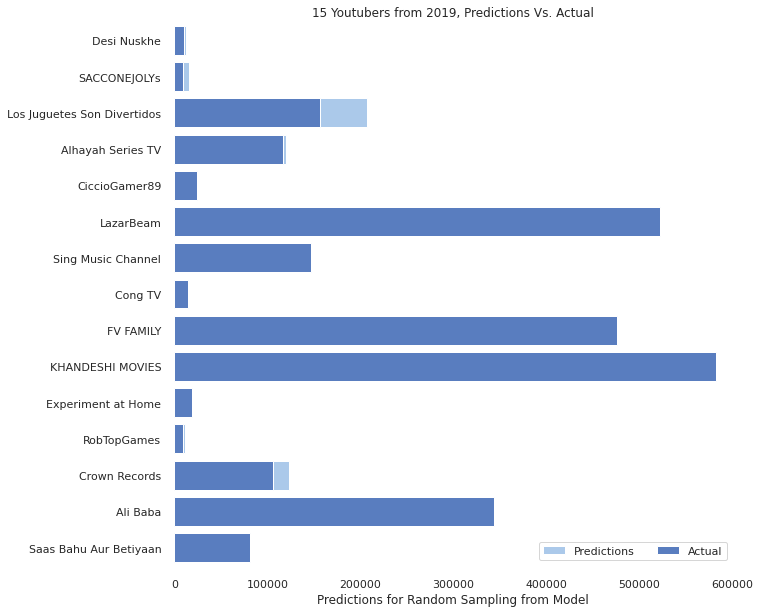

In [0]:
f, ax = plt.subplots(figsize=[10,10])

#plot the predictions
sns.set_color_codes("pastel")
sns.barplot(x="predictions", y=graph.index, data=graph,
            label="Predictions", color="b")

# Plot the actual
sns.set_color_codes("muted")
sns.barplot(x="monthly_average", y=graph.index, data=graph,
            label="Actual", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,600000), ylabel="",
       xlabel="Predictions for Random Sampling from Model",
       title='15 Youtubers from 2019, Predictions Vs. Actual')
sns.despine(left=True, bottom=True)

plt.savefig("predvsactual.png")

In [0]:
tips = sns.load_dataset("tips")

def plot_good_tip(day, total_bill, **kws):

    expected_tip = (total_bill.groupby(day)
                              .mean()
                              .apply(lambda x: x * .2)
                              .reset_index(name="tip"))
    sns.pointplot(expected_tip.day, expected_tip.tip,
                  linestyles=["--"], markers=["D"])

g = sns.FacetGrid(tips, col="sex", size=5)
g.map(sns.pointplot, "day", "tip")
g.map(plot_good_tip, "day", "total_bill")
g.set_axis_labels("day", "tip")